/Users/jdhao/tools/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.616457
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.056515
[t-SNE] KL divergence after 2050 iterations: 0.790503


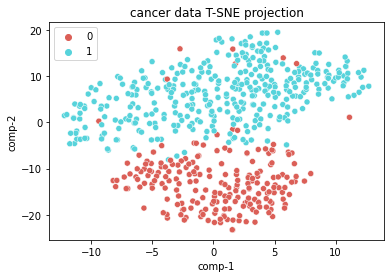

In [1]:
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd

def main():
    x, y = load_breast_cancer(return_X_y=True)
    x = StandardScaler().fit_transform(x)

    # ref: https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html
    tsne = TSNE(n_components=2, perplexity=50, learning_rate='auto', n_iter=5000, verbose=1,)
    z = tsne.fit_transform(x)

    df = pd.DataFrame()
    df["y"] = y
    df["comp-1"] = z[:,0]
    df["comp-2"] = z[:,1]

    sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                    palette=sns.color_palette("hls", 2),
                    data=df).set(title="cancer data T-SNE projection")
    plt.show()


if __name__ == "__main__":
    main()

# ref

+ https://distill.pub/2016/misread-tsne/